# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: July 15th, 2022
* Student Name: Sarah Saas
* Student Net ID: sbs4vb
* This URL: https://github.com/sarahsaas1/DS5100-2022-06-RA/blob/main/FinalProjectSubmissionSBS4VB.pdf
* GitHub Repo URL: https://github.com/sarahsaas1/montecarlo_sbs4vb

# The Monte Carlo Module

In [ ]:
import pandas as pd
import numpy as np
import random


class Die:
    """[A die has N sides, or “faces”, and W weights, and can be rolled to select a face.]
    """



    def __init__(self, faces):
        """[Takes an array of faces as an argument. The array's data type (dtype) may be strings or numbers.
            Internally iInitializes the weights to 1.0 for each face.
            Saves both faces and weights into a private dataframe that is to be shared by the other methods.]

        Args:
            faces ([type]): [this is the face of the die]
        """

        self.faces = faces

        self._dice_df = pd.DataFrame()
        self._dice_df = self._dice_df.assign(die_faces = self.faces)
        self._dice_df = self._dice_df.assign(die_weight = 1)  


    def change_weight(self, face, new_weight):
        """[Takes two arguments: the face value to be changed and the new weight.
            Checks to see if the face passed is valid; is it in the array of weights?
            Checks to see if the weight is valid; is it a float? Can it be converted to one?

        Args:
            face ([string or float or int]): [this is the face of the die]
            new_weight ([float]): [this is the value that determines the probablity of the face coming up]
        """
        
        if face in self._dice_df.die_faces.values:

            if type(new_weight) == float or type(new_weight) == int:

                index_of_face = self._dice_df[self._dice_df['die_faces'] == face].index[0]


                self._dice_df.loc[index_of_face, 'die_weight'] = new_weight


            else:
    
                try:

                    float(self.new_weight)
                    index_of_face = self._dice_df[self._dice_df['die_faces'] == face].index[0]
                    self._dice_df.loc[index_of_face, 'die_weight'] = new_weight

                except:

                    print("Not a float")


        else:
            print("Not a current dice face")

        
    
    def roll_die(self, roll = 1):
        """[Takes a parameter of how many times the die is to be rolled; defaults to 1. 
            This is essentially a random sample from the vector of faces according to the weights.
            Returns a list of outcomes.
            Does not store internally these results.]

        Args:
            roll (int, optional): [the number of times the die is rolled]. Defaults to 1.

        Returns:
            [list]: [list of values generated by rolling the dice]
        """
        
        
        total_weight = self._dice_df['die_weight'].sum()

        probabilities = self._dice_df['die_weight'].div(total_weight)

        return random.choices(self._dice_df['die_faces'], weights = probabilities, k = roll)


    def show_die(self):
        """[Returns the dataframe created in the initialiser. This helps the user keep track of changes]

        Returns:
            [dataframe]: [This is the die that the program currently uses]
        """

        return self._dice_df



class Game:
    """[A game consists of rolling of one or more dice of the same kind one or more times. 
        Each game is initialised with one or more of similarly defined dice (Die objects).
        By “same kind” and “similarly defined” we mean that each die in a given game has the same number of sides and associated faces, but each die object may have its own weights.
        The class has a behavior to play a game, i.e. to rolls all of the dice a given number of times.
        The class keeps the results of its most recent play. ]
    """

    def __init__(self, dices):
        """[Takes a single parameter, a list of already instantiated similar Die objects. This intialises the previously created die into a set. ]

        Args:
            dices ([list]): [list of already instatniated die objects]
        """

        self.dices = dices

    def play(self, num_rolls):
        """[Takes a single parameter, a list of already instantiated similar Die objects.]

        Args:
            num_rolls ([int]): [This is how many times the dice will be rolled]
        """

        self._rolls_results = pd.DataFrame()

        indexs = 0
        for die in self.dices:
            
            dice_rolls = die.roll_die(num_rolls)

            self._rolls_results[indexs] = dice_rolls

            indexs = indexs + 1

    def show_recent(self, wide = True):
        """[shows the user the results of the most recent play.
            This method just passes the private dataframe to the user.
            Takes a parameter to return the dataframe in narrow or wide form.
            This parameter defaults to wide form.
            This parameter should raise an exception of the user passes an invalid option.
            The narrow form of the dataframe will have a two-column index with the roll number and the die number, and a column for the face rolled.
            The wide form of the dataframe will a single column index with the roll number, and each die number as a column.]

        Args:
            wide (bool, optional): [This defines the organisation of the dataframe. The wide format has each die as its own column]. Defaults to True.

        Returns:
            [dataframe]: [This is the result of the game played]
        """

        if wide == True:
            return self._rolls_results

        else:
            
            return self._rolls_results.stack()

    
class Analyser:
    """[An analyzer takes the results of a single game and computes various descriptive statistical properties about it. These properties results are available as attributes of an Analyzer object.]
    """
    
    def __init__(self, game):
        """[Takes the game object and intialises]

        Args:
            game ([type]): [from the Game class this is the resulted die rolls]
        """

        self._result = game.show_recent()

    def jackpot(self):
        """[method to compute how many times the game resulted in all faces being identical.]

        Returns:
            [int]: [This is the amount of times the user hit the jackpot (all dice roll same value)]
        """

         list_bool = self._result.eq(self._result.iloc[:, 0], axis=0).all(1)
         return sum(list_bool)

    def combo(self):
        """[method to compute the distinct combinations of faces rolled, along with their counts]

        Returns:
            [dataframe]: [Returns updated dataframe with combinations rolled and sorts them by frequency]
        """

        return self._result.apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('combo_n')


    def face_counts(self):
        """[method to compute how many times a given face is rolled in each event]

        Returns:
            [dataframe]: [has an index of the roll number and face values as columns]
        """
        
        facecount = _result.apply(pd.Series.value_counts, axis=1).fillna(0)
        return facecount
    

# Test Module

In [ ]:
import unittest
import pandas as pd
import numpy as np
import random

from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyser


class dieTestSuite(unittest.TestCase):
    """[unit tests to test if the methods receive the correct inputs and return valid outputs]

    Args:
        unittest ([type]): [description]
    """

    def test_change_die(self):
        """[checks to see if the weight of the die was changed]
        """
 
        
        test_die = Die([1,2,3,4,5,6])
        test_die.change_weight(2, .3)

        expected = .3

        self.assertEqual(test_die._dice_df.iloc[1,1], expected) 

    def test_roll_die(self):
        """[checks to see if the dicd were rolled. The length of the frame needs to be the same as the number of rolls]
        """

        test_die = Die([1,2,3,4,5,6])
        expected = 5

        self.assertTrue(len(test_die.roll_die(5))  == expected )

    def test_show_die(self):
        """[Test to see if show die shows the die. This is done by creating a tuple of the expected dimensions of the 
            dataframe and comparing that with the results]
        """
    
        test_die = Die([1,2,3,4,5,6])
        expected = (6,2)

        self.assertEqual(test_die._dice_df.shape, expected)

    def test_play(self):
        """[Tests to see if the play method returns the correct data frame. This is tested by creating a tuple of the expected
            dimensions of the dataframe and comparing that with the returned frame ]
        """

        test_game_die = Game([ Die([1,2,3,4,5,6]),  Die([1,2,3,4,5,6]), Die([1,2,3,4,5,6])])

        expected = (3,3)

        test_game_die.play(3)

        self.assertEqual(test_game_die._rolls_results.shape, expected)


    def test_show_recent(self):
        """[Tests to see if the show recent method returns the correct data frame. This is tested by creating a tuple of the expected
            dimensions of the dataframe and comparing that with the returned frame]
        """

        test_game_die = Game([ Die([1,2,3,4,5,6]),  Die([1,2,3,4,5,6]), Die([1,2,3,4,5,6])])

        expected = (3,3)

        test_game_die.play(3)
        test_game_die.show_recent()

        self.assertEqual(test_game_die._rolls_results.shape, expected)

    def test_jackpot(self):
        """[Tests to see if the jackpot method returns the number of times all dice were the same face. This is  tested by 
            running the game and comparing the jackpots. ]
        """

        game1 = Game([ Die([1,2,3,4,5,6]),  Die([1,2,3,4,5,6]), Die([1,2,3,4,5,6])])
        game1.play(3)

        test_analyser_die = Analyser(game1)

        jackpots = sum(test_analyser_die._result.eq(test_analyser_die._result.iloc[:, 0], axis=0).all(1))


        self.assertEqual(test_analyser_die.jackpot(), jackpots)

    def combo(self):
        """[Tests to see if the combo method returns the data frame with the combinations of rolls. This is tested by
            making sure the length is the same as the number of rolls]
        """

        game1 = Game([ Die([1,2,3,4,5,6]),  Die([1,2,3,4,5,6]), Die([1,2,3,4,5,6])])
        game1.play(3)

        test_analyser_die = Analyser(game1)

        combos = test_analyser_die.combo().combo_n.sum()

        self.assertEqual(combos, 3)


    def face_counts(self):
        """[Test to see if face_counts method generates the number of times a value comes up during rolls. This is tested
            by making sure the length is the same as the number of rolls]
        """

        game1 = Game([ Die([1,2,3,4,5,6]),  Die([1,2,3,4,5,6]), Die([1,2,3,4,5,6])])
        game1.play(3)

        test_analyser_die = Analyser(game1)

        counts = test_analyser_die.face_counts().sum()

        self.assertEqual(combos, 3)





if __name__ == '__main__':
        
    unittest.main(verbosity=3)  

# Test Results

```text
test_change_die (__main__.dieTestSuite) ... ok
test_jackpot (__main__.dieTestSuite) ... ok
test_play (__main__.dieTestSuite) ... ok
test_roll_die (__main__.dieTestSuite) ... ok
test_show_die (__main__.dieTestSuite) ... ok
test_show_recent (__main__.dieTestSuite) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.022s

OK 
'''


# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [5]:
from montecarlo import *
import matplotlib.pyplot as plt

In [6]:
fair_coin = Die(["Heads", "Tails"])
unfair_coin = Die(["Heads", "Tails"])

unfair_coin.change_weight("Heads", 5.0)
unfair_coin.change_weight("Tails", 1.0)

game_fair = Game([fair_coin, fair_coin, fair_coin])
game_fair.play(1000)

stats_fair = Analyser(game_fair)
jackpot_fair = stats_fair.jackpot()

game_unfair = Game([unfair_coin, unfair_coin, unfair_coin])
game_unfair.play(1000)

stats_unfair = Analyser(game_unfair)
jackpot_unfair = stats_unfair.jackpot()

rel_fair = jackpot_fair / 1000
rel_unfair = jackpot_unfair / 1000

<BarContainer object of 2 artists>

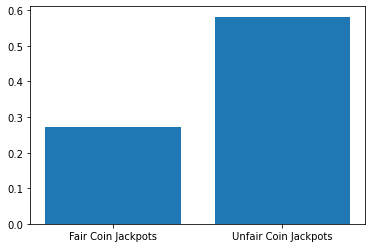

In [7]:
plt.bar(['Fair Coin Jackpots', 'Unfair Coin Jackpots'], [rel_fair, rel_unfair])

## Scenario 2

In [8]:
fair_die = Die([1,2,3,4,5,6])
unfair_die1 = Die([1,2,3,4,5,6])
unfair_die2 = Die([1,2,3,4,5,6])

unfair_die1.change_weight(6, 5.0)
unfair_die2.change_weight(1, 5.0)

game_fair = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
game_fair.play(10000)

stats_fair = Analyser(game_fair)
jackpot_fair = stats_fair.jackpot()

game_unfair = Game([unfair_die1, unfair_die1, unfair_die2,fair_die, fair_die ])
game_unfair.play(10000)

stats_unfair = Analyser(game_unfair)
jackpot_unfair1 = stats_unfair.jackpot()

rel_fair = jackpot_fair / 10000
rel_unfair = jackpot_unfair / 10000



<BarContainer object of 2 artists>

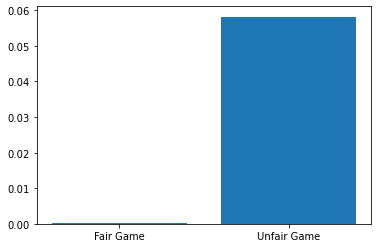

In [9]:
plt.bar(['Fair Game', 'Unfair Game'], [rel_fair, rel_unfair])

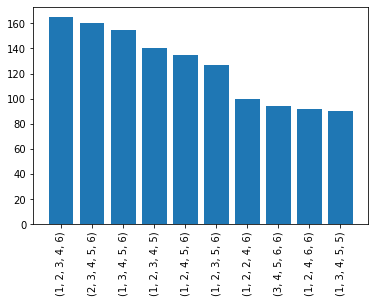

In [10]:
stats_fair.combo()

popular_combos = stats_fair.combo().head(10)
popular_combos

labels = [str(x) for x in popular_combos.index]
plt.bar(labels, popular_combos['combo_n'])
plt.xticks(range(len(labels)), labels, rotation='vertical')
plt.show()

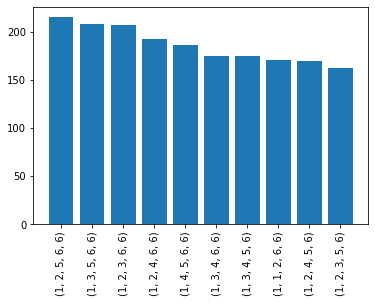

In [11]:
stats_unfair.combo()

popular_combos = stats_unfair.combo().head(10)
popular_combos

labels = [str(x) for x in popular_combos.index]
plt.bar(labels, popular_combos['combo_n'])
plt.xticks(range(len(labels)), labels, rotation='vertical')
plt.show()

## Scenario 3

In [12]:
alpha_die = Die(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
             'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 
             's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
alpha_die.change_weight('a', 8.4966)
alpha_die.change_weight('b',  2.0720)
alpha_die.change_weight('c', 4.5388)
alpha_die.change_weight('d', 3.3844)
alpha_die.change_weight('e', 11.1607)
alpha_die.change_weight('f', 1.8121)
alpha_die.change_weight('g', 2.4705)
alpha_die.change_weight('h', 3.0034)
alpha_die.change_weight('i', 7.5448)
alpha_die.change_weight('j', 0.1965)
alpha_die.change_weight('k', 1.1016)
alpha_die.change_weight('l', 5.4893)
alpha_die.change_weight('m', 3.0129)
alpha_die.change_weight('n', 6.6544)
alpha_die.change_weight('o', 7.1635)
alpha_die.change_weight('p', 3.1671)
alpha_die.change_weight('q', 0.1962)
alpha_die.change_weight('r', 7.5809)
alpha_die.change_weight('s', 5.7351)
alpha_die.change_weight('t', 6.9509)
alpha_die.change_weight('u', 3.6308)
alpha_die.change_weight('v', 1.0074)
alpha_die.change_weight('w', 1.2899)
alpha_die.change_weight('x', 0.2902)
alpha_die.change_weight('y', 1.7779)
alpha_die.change_weight('z',  0.2722)

In [13]:
game_fair = Game([alpha_die, alpha_die, alpha_die, alpha_die, alpha_die])
game_fair.play(10000)

stats_fair = Analyser(game_fair)

stats_fair.combo()
alpha_df = stats_fair._result
alpha_df.head(100)
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#print(alpha_df)

,0,1,2,3,4
0,t,e,p,e,b
1,v,s,s,j,n
2,k,i,i,e,p
3,e,u,l,i,t
4,s,c,l,s,v
...,...,...,...,...,...
95,c,l,r,c,i
96,t,o,n,d,g
97,s,t,l,l,n
98,t,a,e,e,s


After running a few times, it seems to be about 1 out of 175 words are words or .0057 frequency.

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [18]:
!ls -lRF -o

total 24
-rw-r--r--  1 sarahsaas  1067 Jul 15 22:44 LICENSE
drwxr-xr-x  7 sarahsaas   224 Jul 15 22:45 Montecarlo_sbs4vb/
drwxr-xr-x  7 sarahsaas   224 Jul 15 22:46 Montecarlo_sbs4vb.egg-info/
-rw-r--r--  1 sarahsaas    19 Jul 15 22:44 README.md
-rw-r--r--@ 1 sarahsaas   344 Jul 15 22:42 setup.py

./Montecarlo_sbs4vb:
total 32
-rw-r--r--  1 sarahsaas     0 Jul 15 22:42 __init__.py
-rw-r--r--  1 sarahsaas   368 Jul 15 21:59 monetecarlo_test.txt
-rw-r--r--  1 sarahsaas  7036 Jul 15 22:16 montecarlo.py
-rw-r--r--  1 sarahsaas  3874 Jul 15 22:24 montecarlo_test.py

./Montecarlo_sbs4vb.egg-info:
total 40
-rw-r--r--  1 sarahsaas  286 Jul 15 22:46 PKG-INFO
-rw-r--r--  1 sarahsaas  329 Jul 15 22:46 SOURCES.txt
-rw-r--r--  1 sarahsaas    1 Jul 15 22:46 dependency_links.txt
-rw-r--r--  1 sarahsaas   13 Jul 15 22:46 requires.txt
-rw-r--r--  1 sarahsaas   18 Jul 15 22:46 top_level.txt


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands

In [19]:
pip install -e .

Obtaining file:///Users/sarahsaas/Desktop/MSDS/DS5100/montecarlo_sbs4vb
  Attempting uninstall: Montecarlo-sbs4vb
    Found existing installation: Montecarlo-sbs4vb 0.0.0
    Uninstalling Montecarlo-sbs4vb-0.0.0:
      Successfully uninstalled Montecarlo-sbs4vb-0.0.0
  Running setup.py develop for Montecarlo-sbs4vb
Note: you may need to restart the kernel to use updated packages.
